In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
data1 = pd.read_csv("/Users/luizmaniero/Documents/DataScience/HMRI_IHC_colab/20250504_CD45_results/cd45_Results_20250504.csv")
data2 = pd.read_csv("/Users/luizmaniero/Documents/DataScience/HMRI_IHC_colab/20250701_CD45_results/cd45_Nuclei_count_20250107.csv")



In [ ]:
data2.head()

,Slice,Count,Total Area,Average Size,%Area,Perim.
0,Image_CD45_416_-_20x_BF_05_crop_2_Colour_1_mas...,56,32184,574.714,11.715,87.357
1,Image_CD45_416_-_20x_BF_05_crop_3_Colour_1_mas...,55,25291,459.836,9.206,77.200
2,Image_CD45_416_-_20x_BF_06_crop_1_Colour_1_mas...,54,36138,669.222,13.154,94.873
3,Image_CD45_420_-_20x_BF_06_crop_1_Colour_1_mas...,63,28730,456.032,10.458,77.716
4,Image_CD45_420_-_20x_BF_06_crop_2_Colour_1_mas...,39,26764,686.256,9.742,94.564


In [6]:
data1.head(5)

,,Label,Area,Mean,IntDen,Median,%Area,RawIntDen,MinThr,MaxThr
0,1,Image_CD45_416_-_20x_BF_05_crop_2_Colour_3_mas...,4872,255,1242360,255,1.773,1242360,255,255
1,2,Image_CD45_416_-_20x_BF_05_crop_3_Colour_3_mas...,2002,255,510510,255,0.729,510510,255,255
2,3,Image_CD45_416_-_20x_BF_06_crop_1_Colour_3_mas...,3327,255,848385,255,1.211,848385,255,255
3,4,Image_CD45_420_-_20x_BF_06_crop_1_Colour_3_mas...,1056,255,269280,255,0.384,269280,255,255
4,5,Image_CD45_420_-_20x_BF_06_crop_2_Colour_3_mas...,849,255,216495,255,0.309,216495,255,255


In [14]:
# === 2. Extract the common image ID from filenames ===
data1['ImageID'] = data1['Label'].str.extract(r'(Image_CD45_.*?_crop_\d)')
data2['ImageID'] = data2['Slice'].str.extract(r'(Image_CD45_.*?_crop_\d)')

# === 3. Merge on the extracted ID ===
merged_df = pd.merge(data1, data2, on='ImageID', how='inner', suffixes=('_cd45', '_nuclei'))

# === 4. Save or display the result ===
merged_df.to_csv("merged_image_analysis.csv", index=False)

In [15]:
merged_df.head(10)

,,Label,Area,Mean,IntDen,Median,%Area_cd45,RawIntDen,MinThr,MaxThr,ImageID,Slice,Count,Total Area,Average Size,%Area_nuclei,Perim.
0,1,Image_CD45_416_-_20x_BF_05_crop_2_Colour_3_mas...,4872,255,1242360,255,1.773,1242360,255,255,Image_CD45_416_-_20x_BF_05_crop_2,Image_CD45_416_-_20x_BF_05_crop_2_Colour_1_mas...,56,32184,574.714,11.715,87.357
1,2,Image_CD45_416_-_20x_BF_05_crop_3_Colour_3_mas...,2002,255,510510,255,0.729,510510,255,255,Image_CD45_416_-_20x_BF_05_crop_3,Image_CD45_416_-_20x_BF_05_crop_3_Colour_1_mas...,55,25291,459.836,9.206,77.200
2,3,Image_CD45_416_-_20x_BF_06_crop_1_Colour_3_mas...,3327,255,848385,255,1.211,848385,255,255,Image_CD45_416_-_20x_BF_06_crop_1,Image_CD45_416_-_20x_BF_06_crop_1_Colour_1_mas...,54,36138,669.222,13.154,94.873
3,4,Image_CD45_420_-_20x_BF_06_crop_1_Colour_3_mas...,1056,255,269280,255,0.384,269280,255,255,Image_CD45_420_-_20x_BF_06_crop_1,Image_CD45_420_-_20x_BF_06_crop_1_Colour_1_mas...,63,28730,456.032,10.458,77.716
4,5,Image_CD45_420_-_20x_BF_06_crop_2_Colour_3_mas...,849,255,216495,255,0.309,216495,255,255,Image_CD45_420_-_20x_BF_06_crop_2,Image_CD45_420_-_20x_BF_06_crop_2_Colour_1_mas...,39,26764,686.256,9.742,94.564
5,6,Image_CD45_420_-_20x_BF_06_crop_3_Colour_3_mas...,1324,255,337620,255,0.482,337620,255,255,Image_CD45_420_-_20x_BF_06_crop_3,Image_CD45_420_-_20x_BF_06_crop_3_Colour_1_mas...,55,22711,412.927,8.267,74.498
6,7,Image_CD45_428_-_20x_BF_02_crop_1_Colour_3_mas...,8786,255,2240430,255,3.198,2240430,255,255,Image_CD45_428_-_20x_BF_02_crop_1,Image_CD45_428_-_20x_BF_02_crop_1_Colour_1_mas...,42,21768,518.286,7.924,82.311
7,8,Image_CD45_428_-_20x_BF_02_crop_2_Colour_3_mas...,7577,255,1932135,255,2.758,1932135,255,255,Image_CD45_428_-_20x_BF_02_crop_2,Image_CD45_428_-_20x_BF_02_crop_2_Colour_1_mas...,40,23205,580.125,8.447,89.106
8,9,Image_CD45_428_-_20x_BF_02_crop_3_Colour_3_mas...,2911,255,742305,255,1.060,742305,255,255,Image_CD45_428_-_20x_BF_02_crop_3,Image_CD45_428_-_20x_BF_02_crop_3_Colour_1_mas...,46,34145,742.283,12.429,98.314
9,10,Image_CD45_431_-_20x_BF_01_crop_1_Colour_3_mas...,2184,255,556920,255,0.795,556920,255,255,Image_CD45_431_-_20x_BF_01_crop_1,Image_CD45_431_-_20x_BF_01_crop_1_Colour_1_mas...,47,30624,651.574,11.147,91.341


In [17]:
df = merged_df[['ImageID', 'Count', 'RawIntDen']]

In [18]:
df.head(10)

,ImageID,Count,RawIntDen
0,Image_CD45_416_-_20x_BF_05_crop_2,56,1242360
1,Image_CD45_416_-_20x_BF_05_crop_3,55,510510
2,Image_CD45_416_-_20x_BF_06_crop_1,54,848385
3,Image_CD45_420_-_20x_BF_06_crop_1,63,269280
4,Image_CD45_420_-_20x_BF_06_crop_2,39,216495
5,Image_CD45_420_-_20x_BF_06_crop_3,55,337620
6,Image_CD45_428_-_20x_BF_02_crop_1,42,2240430
7,Image_CD45_428_-_20x_BF_02_crop_2,40,1932135
8,Image_CD45_428_-_20x_BF_02_crop_3,46,742305
9,Image_CD45_431_-_20x_BF_01_crop_1,47,556920


In [19]:
df['Normalized'] = df['RawIntDen']/df['Count']

/var/folders/fk/3y6t2wps21bb7h_0r4p99ccc0000gn/T/ipykernel_1596/2961083056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Normalized'] = df['RawIntDen']/df['Count']


In [20]:
df.head()

,ImageID,Count,RawIntDen,Normalized
0,Image_CD45_416_-_20x_BF_05_crop_2,56,1242360,22185.000000
1,Image_CD45_416_-_20x_BF_05_crop_3,55,510510,9282.000000
2,Image_CD45_416_-_20x_BF_06_crop_1,54,848385,15710.833333
3,Image_CD45_420_-_20x_BF_06_crop_1,63,269280,4274.285714
4,Image_CD45_420_-_20x_BF_06_crop_2,39,216495,5551.153846


In [21]:
df['Group'] = df['ImageID'].str.extract(r'_CD45_(\d+)_')[0]

/var/folders/fk/3y6t2wps21bb7h_0r4p99ccc0000gn/T/ipykernel_1596/2322105838.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Group'] = df['ImageID'].str.extract(r'_CD45_(\d+)_')[0]


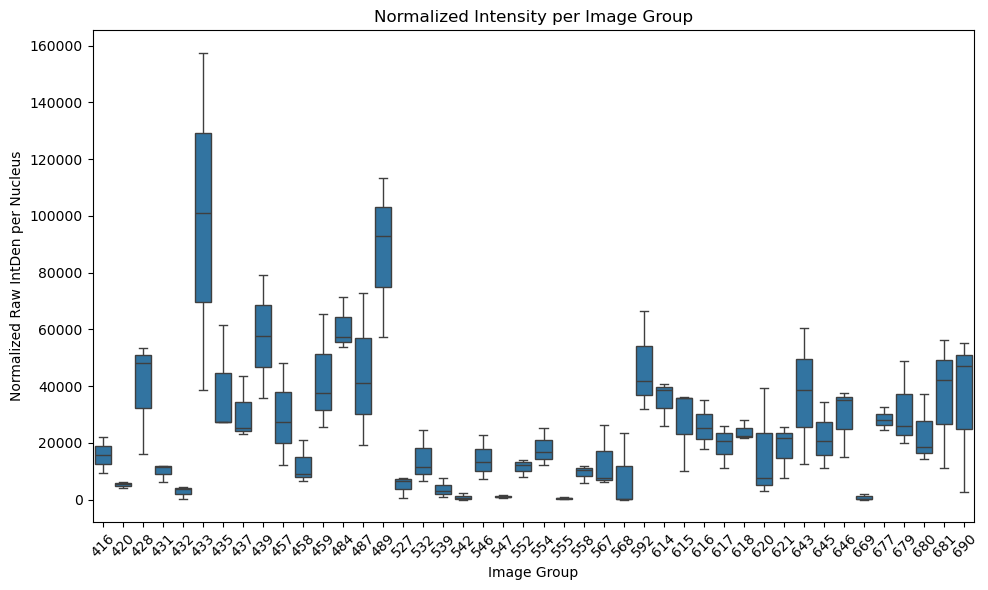

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='Normalized', data=df)
plt.xlabel('Image Group')
plt.ylabel('Normalized Raw IntDen per Nucleus')
plt.title('Normalized Intensity per Image Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
data4 = pd.read_csv("/Users/luizmaniero/Documents/DataScience/HMRI_IHC_colab/20250503_bGAL_results/bGAL_Results_20250503.csv")
data5 = pd.read_csv("/Users/luizmaniero/Documents/DataScience/HMRI_IHC_colab/20250701_bGAL_results/bGAL_Nuclei_count_20250107.csv")


In [28]:
data4.head

<bound method NDFrame.head of                                                       Label   Area   Mean  \
0      1  Image_B_Gal_416_-_20x_BF_02_crop_1_Colour_3_ma...  11502  255.0   
1      2  Image_B_Gal_416_-_20x_BF_02_crop_2_Colour_3_ma...   3234  255.0   
2      3  Image_B_Gal_416_-_20x_BF_02_crop_3_Colour_3_ma...   4375  255.0   
3      4  Image_B_Gal_420_-_20x_BF_02_crop_1_Colour_3_ma...    390  255.0   
4      5  Image_B_Gal_420_-_20x_BF_02_crop_2_Colour_3_ma...    156  255.0   
..   ...                                                ...    ...    ...   
136  137  Image_B_Gal_WT2_-_20x_BF_02_crop_2_Colour_3_ma...      0    NaN   
137  138  Image_B_Gal_WT2_-_20x_BF_02_crop_3_Colour_3_ma...      8  255.0   
138  139  Image_B_Gal_WT3_-_20x_BF_02_crop_1_Colour_3_ma...      0    NaN   
139  140  Image_B_Gal_WT3_-_20x_BF_02_crop_2_Colour_3_ma...     92  255.0   
140  141  Image_B_Gal_WT3_-_20x_BF_02_crop_3_Colour_3_ma...     34  255.0   

        IntDen  Median  %Area  RawIntDen  Min

In [29]:
# === 2. Extract the common image ID from filenames ===
data4['ImageID'] = data4['Label'].str.extract(r'(Image_B_Gal_.*?_crop_\d)')
data5['ImageID'] = data5['Slice'].str.extract(r'(Image_B_Gal_.*?_crop_\d)')

# === 3. Merge on the extracted ID ===
m_df = pd.merge(data4, data5, on='ImageID', how='inner', suffixes=('_bGAL', '_nuclei'))

# === 4. Save or display the result ===
m_df.to_csv("merged_image_analysis.csv", index=False)

In [30]:
m_df.head(10)

,,Label,Area,Mean,IntDen,Median,%Area_bGAL,RawIntDen,MinThr,MaxThr,ImageID,Slice,Count,Total Area,Average Size,%Area_nuclei,Perim.
0,1,Image_B_Gal_416_-_20x_BF_02_crop_1_Colour_3_ma...,11502,255.0,2933010.0,255.0,4.225,2933010.0,255,255,Image_B_Gal_416_-_20x_BF_02_crop_1,Image_B_Gal_416_-_20x_BF_02_crop_1_Colour_1_ma...,27,16173,599.000,5.940,89.860
1,2,Image_B_Gal_416_-_20x_BF_02_crop_2_Colour_3_ma...,3234,255.0,824670.0,255.0,1.177,824670.0,255,255,Image_B_Gal_416_-_20x_BF_02_crop_2,Image_B_Gal_416_-_20x_BF_02_crop_2_Colour_1_ma...,52,26631,512.135,9.694,82.670
2,3,Image_B_Gal_416_-_20x_BF_02_crop_3_Colour_3_ma...,4375,255.0,1115625.0,255.0,1.593,1115625.0,255,255,Image_B_Gal_416_-_20x_BF_02_crop_3,Image_B_Gal_416_-_20x_BF_02_crop_3_Colour_1_ma...,0,0,NaN,0.000,NaN
3,4,Image_B_Gal_420_-_20x_BF_02_crop_1_Colour_3_ma...,390,255.0,99450.0,255.0,0.142,99450.0,255,255,Image_B_Gal_420_-_20x_BF_02_crop_1,Image_B_Gal_420_-_20x_BF_02_crop_1_Colour_1_ma...,71,37623,529.901,13.695,83.852
4,5,Image_B_Gal_420_-_20x_BF_02_crop_2_Colour_3_ma...,156,255.0,39780.0,255.0,0.057,39780.0,255,255,Image_B_Gal_420_-_20x_BF_02_crop_2,Image_B_Gal_420_-_20x_BF_02_crop_2_Colour_1_ma...,58,36862,635.552,13.418,92.161
5,6,Image_B_Gal_420_-_20x_BF_02_crop_3_Colour_3_ma...,613,255.0,156315.0,255.0,0.223,156315.0,255,255,Image_B_Gal_420_-_20x_BF_02_crop_3,Image_B_Gal_420_-_20x_BF_02_crop_3_Colour_1_ma...,65,39765,611.769,14.474,92.229
6,7,Image_B_Gal_428_-_20x_BF_02_crop_1_Colour_3_ma...,105,255.0,26775.0,255.0,0.038,26775.0,255,255,Image_B_Gal_428_-_20x_BF_02_crop_1,Image_B_Gal_428_-_20x_BF_02_crop_1_Colour_1_ma...,29,23816,821.241,8.669,103.822
7,8,Image_B_Gal_428_-_20x_BF_02_crop_2_Colour_3_ma...,932,255.0,237660.0,255.0,0.339,237660.0,255,255,Image_B_Gal_428_-_20x_BF_02_crop_2,Image_B_Gal_428_-_20x_BF_02_crop_2_Colour_1_ma...,49,24398,497.918,8.881,82.485
8,9,Image_B_Gal_428_-_20x_BF_02_crop_3_Colour_3_ma...,589,255.0,150195.0,255.0,0.214,150195.0,255,255,Image_B_Gal_428_-_20x_BF_02_crop_3,Image_B_Gal_428_-_20x_BF_02_crop_3_Colour_1_ma...,51,33711,661.000,12.271,94.724
9,10,Image_B_Gal_431_-_20x_BF_02_crop_1_Colour_3_ma...,22,255.0,5610.0,255.0,0.008,5610.0,255,255,Image_B_Gal_431_-_20x_BF_02_crop_1,Image_B_Gal_431_-_20x_BF_02_crop_1_Colour_1_ma...,26,20845,801.731,7.588,102.143


In [31]:
df_b = m_df[['ImageID', 'Count', 'RawIntDen']]
df_b['Normalized'] = df_b['RawIntDen']/df_b['Count']
df_b['Group'] = df_b['ImageID'].str.extract(r'_B_Gal_(\d+)_')[0]


/var/folders/fk/3y6t2wps21bb7h_0r4p99ccc0000gn/T/ipykernel_1596/737369546.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b['Normalized'] = df_b['RawIntDen']/df_b['Count']
/var/folders/fk/3y6t2wps21bb7h_0r4p99ccc0000gn/T/ipykernel_1596/737369546.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b['Group'] = df_b['ImageID'].str.extract(r'_B_Gal_(\d+)_')[0]


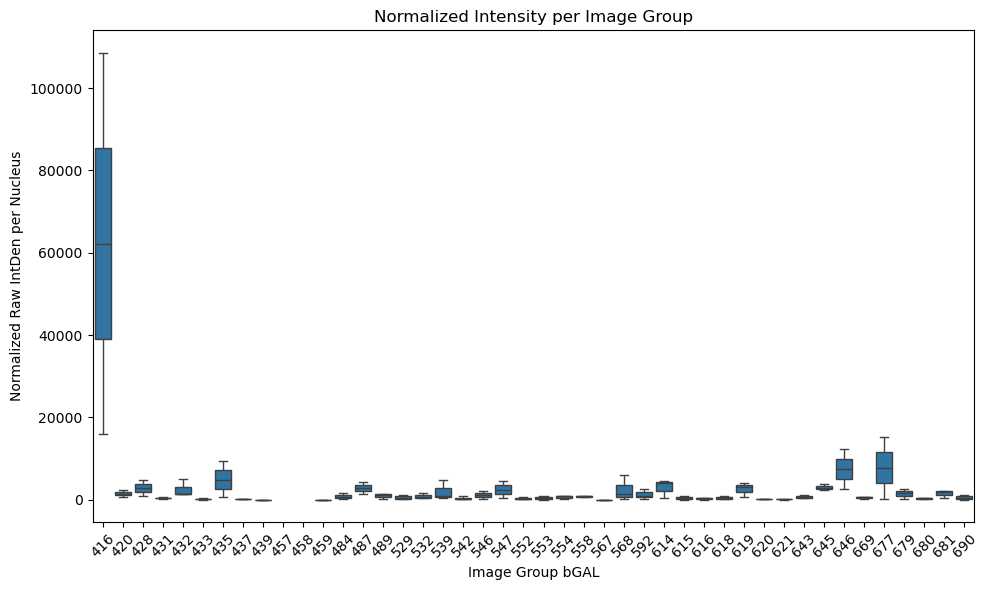

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='Normalized', data=df_b)
plt.xlabel('Image Group bGAL')
plt.ylabel('Normalized Raw IntDen per Nucleus')
plt.title('Normalized Intensity per Image Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/opt/miniconda3/envs/quadrant/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/miniconda3/envs/quadrant/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


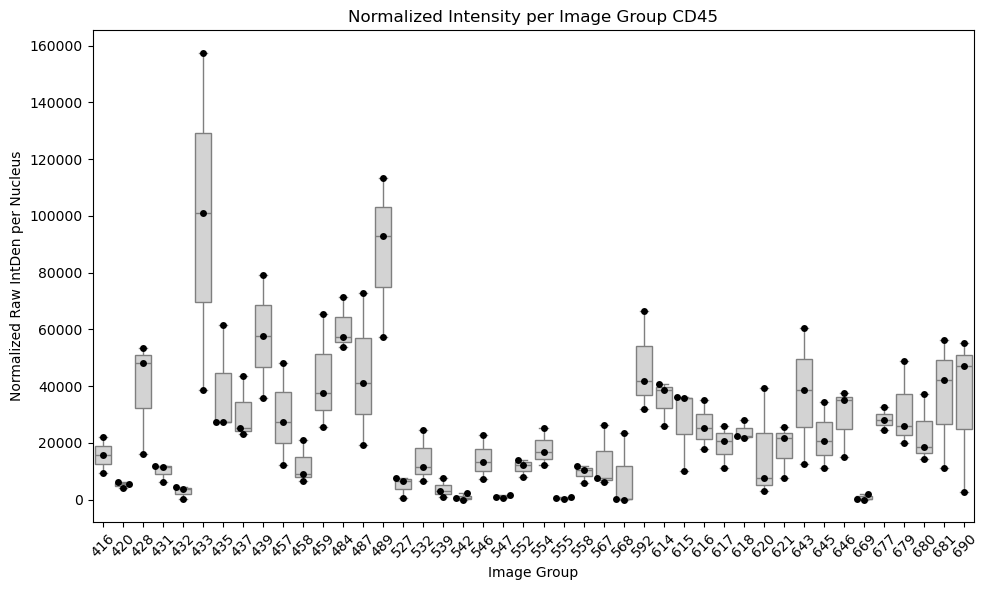

In [34]:
plt.figure(figsize=(10, 6))

# Boxplot
sns.boxplot(x='Group', y='Normalized', data=df, color='lightgray', showfliers=False)
sns.swarmplot(x='Group', y='Normalized', data=df, color='black', size=5)

plt.xlabel('Image Group')
plt.ylabel('Normalized Raw IntDen per Nucleus')
plt.title('Normalized Intensity per Image Group CD45')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/opt/miniconda3/envs/quadrant/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/miniconda3/envs/quadrant/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/miniconda3/envs/quadrant/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


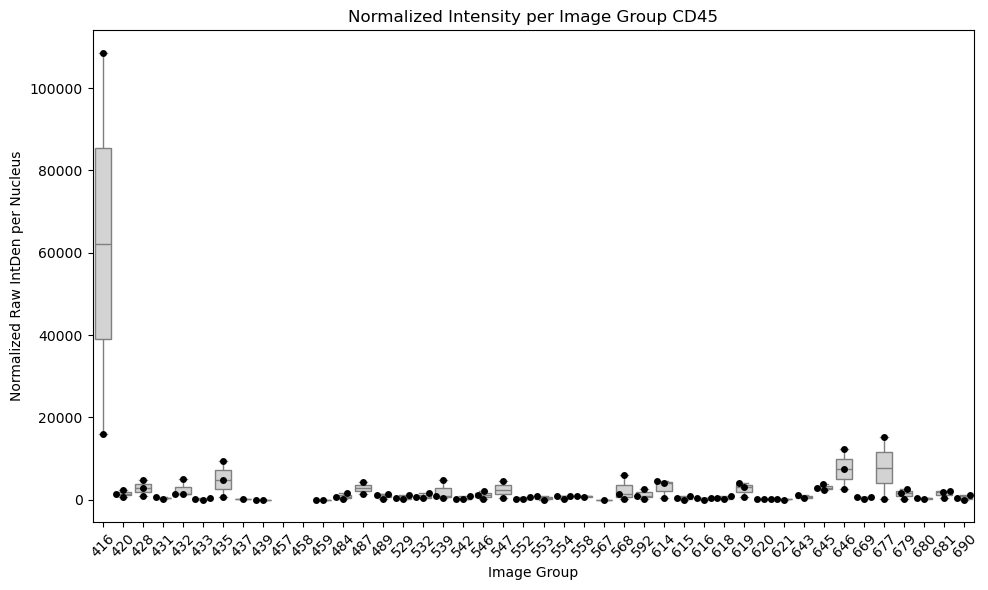

In [35]:
plt.figure(figsize=(10, 6))

# Boxplot
sns.boxplot(x='Group', y='Normalized', data=df_b, color='lightgray', showfliers=False)
sns.swarmplot(x='Group', y='Normalized', data=df_b, color='black', size=5)

plt.xlabel('Image Group')
plt.ylabel('Normalized Raw IntDen per Nucleus')
plt.title('Normalized Intensity per Image Group CD45')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
